In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
glass = pd.read_csv('/home/sushil/Documents/Assingment/KNN-13/glass.csv')

In [3]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


<AxesSubplot:>

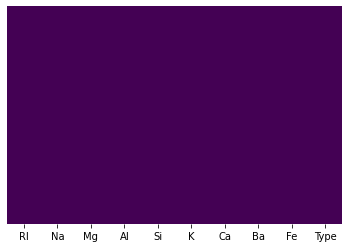

In [4]:
sns.heatmap(glass.isnull(), cmap = 'viridis', cbar = False, yticklabels = False)

In [5]:
glass.shape

(214, 10)

<AxesSubplot:xlabel='Type', ylabel='count'>

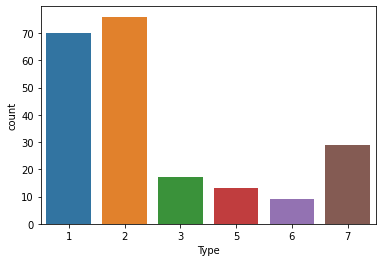

In [6]:
sns.countplot(glass['Type'])

In [7]:
glass['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

<AxesSubplot:xlabel='Ba', ylabel='Fe'>

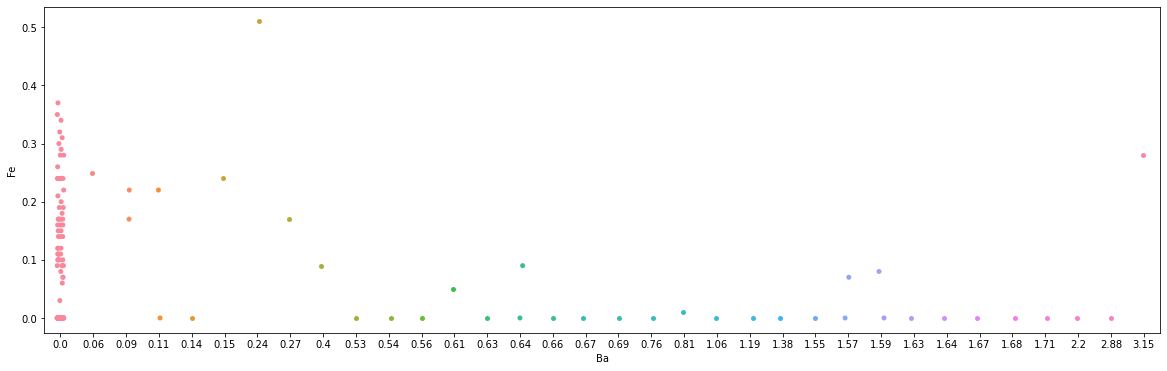

In [8]:
plt.figure(figsize = (20,6))
sns.stripplot(x = glass['Ba'], y = glass['Fe'])

<AxesSubplot:xlabel='Fe'>

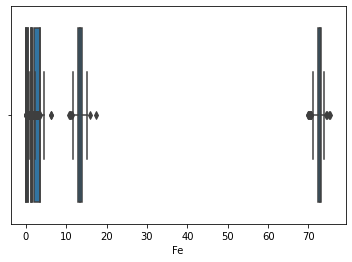

In [9]:
sns.boxplot(glass['Al'])
sns.boxplot(glass['Si'])
sns.boxplot(glass['Mg'])
sns.boxplot(glass['Na'])
sns.boxplot(glass['RI'])
sns.boxplot(glass['K'])
sns.boxplot(glass['Ba'])
sns.boxplot(glass['Fe'])

In [10]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [11]:
x = glass.iloc[:, 0:9]
x.head()
y = glass.iloc[:, 9]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Type, dtype: int64

In [12]:
bestfeatures = SelectKBest(score_func = chi2, k = 6)

In [13]:
fit = bestfeatures.fit(x,y)

In [14]:
scores = pd.DataFrame(fit.scores_)

In [15]:
column_names = pd.DataFrame(x.columns)

In [16]:
featureScores = pd.concat([column_names, scores], axis = 1)

In [17]:
featureScores.columns = ['Features', 'Scores']

In [18]:
print(featureScores.nlargest(10, 'Scores'))

  Features      Scores
7       Ba  145.514077
2       Mg  100.984212
5        K   31.670632
3       Al   16.977488
1       Na    4.311253
6       Ca    3.210929
8       Fe    2.170185
4       Si    0.110449
0       RI    0.000048


In [19]:
from sklearn.ensemble import ExtraTreesClassifier

In [20]:
model = ExtraTreesClassifier()

In [21]:
model.fit(x,y)

ExtraTreesClassifier()

In [22]:
print(model.feature_importances_)

[0.13255721 0.09795894 0.18341855 0.13576696 0.08971974 0.10312476
 0.12829236 0.07587418 0.05328731]


In [23]:
feat_importances = pd.Series(model.feature_importances_, index = x.columns)

<AxesSubplot:>

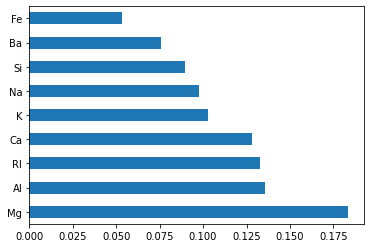

In [24]:
feat_importances.nlargest(9).plot(kind = 'barh')

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
from imblearn.over_sampling import SMOTE

In [27]:
glass1 = glass

In [28]:
x2 = glass1.drop(['Type', 'Fe', 'Ba', 'Si', 'Na'], axis = 1)

In [29]:
x2.head()

,RI,Mg,Al,K,Ca
0,1.52101,4.49,1.10,0.06,8.75
1,1.51761,3.60,1.36,0.48,7.83
2,1.51618,3.55,1.54,0.39,7.78
3,1.51766,3.69,1.29,0.57,8.22
4,1.51742,3.62,1.24,0.55,8.07


In [30]:
y2 = glass1['Type']

In [31]:
y2.head()

0    1
1    1
2    1
3    1
4    1
Name: Type, dtype: int64

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x2,y2, test_size = 0.25, random_state = 27)

In [33]:
sm = SMOTE(k_neighbors = 4, random_state = 27)

In [34]:
x_train.head()

,RI,Mg,Al,K,Ca
8,1.51918,3.58,1.37,0.56,8.30
165,1.52171,1.88,1.56,0.47,11.41
166,1.52151,1.71,1.56,0.58,11.62
134,1.51811,3.85,1.25,0.52,8.12
74,1.51596,3.56,1.54,0.72,7.90


In [35]:
y_train.head()

8      1
165    5
166    5
134    2
74     2
Name: Type, dtype: int64

In [37]:
x_train, y_train = sm.fit_resample(x_train, y_train)

In [38]:
from sklearn.neighbors import KNeighborsClassifier as KNC

In [39]:
acc = []

for i in range(3,50,2):
    neigh = KNC(n_neighbors = i)
    neigh.fit(x_train, y_train)
    train_acc = np.mean(neigh.predict(x_train) == y_train)
    test_acc = np.mean(neigh.predict(x_test) == y_test)
    acc.append([train_acc, test_acc])

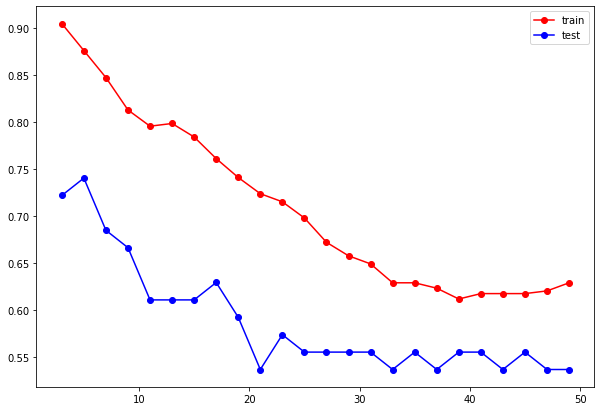

In [40]:
plt.figure(figsize = (10,7))
plt.plot(np.arange(3,50,2), [i[0] for i in acc], 'ro-')
plt.plot(np.arange(3,50,2), [i[1] for i in acc], 'bo-')
plt.legend(["train", "test"])

In [41]:
neigh = KNC(n_neighbors = 5)

In [42]:
neigh.fit(x_train, y_train)

KNeighborsClassifier()

In [43]:
train_acc = np.mean(neigh.predict(x_train) == y_train)
test_acc = np.mean(neigh.predict(x_test) == y_test)

In [44]:
train_acc

0.8764367816091954

In [45]:
test_acc

0.7407407407407407

In [46]:
from sklearn.metrics import classification_report, confusion_matrix

In [47]:
print(classification_report(y_train, neigh.predict(x_train)))

              precision    recall  f1-score   support

           1       0.75      0.71      0.73        58
           2       0.88      0.74      0.80        58
           3       0.81      0.97      0.88        58
           5       0.92      1.00      0.96        58
           6       0.93      0.98      0.96        58
           7       0.98      0.86      0.92        58

    accuracy                           0.88       348
   macro avg       0.88      0.88      0.87       348
weighted avg       0.88      0.88      0.87       348



In [48]:
print(classification_report(y_test, neigh.predict(x_test)))

              precision    recall  f1-score   support

           1       0.67      0.67      0.67        12
           2       0.88      0.64      0.74        22
           3       0.40      0.67      0.50         3
           5       0.50      0.67      0.57         3
           6       0.60      1.00      0.75         3
           7       0.92      1.00      0.96        11

    accuracy                           0.74        54
   macro avg       0.66      0.77      0.70        54
weighted avg       0.77      0.74      0.74        54



In [49]:
glass2 = glass 

In [50]:
glass2.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [51]:
x3 = glass2.drop(['Na', 'Ca', 'Fe', 'Si', 'RI'], axis = 1)

In [52]:
x3.head()

,Mg,Al,K,Ba,Type
0,4.49,1.10,0.06,0.0,1
1,3.60,1.36,0.48,0.0,1
2,3.55,1.54,0.39,0.0,1
3,3.69,1.29,0.57,0.0,1
4,3.62,1.24,0.55,0.0,1


In [53]:
x3.drop('Type', axis = 1, inplace = True)

In [54]:
x3.head()

,Mg,Al,K,Ba
0,4.49,1.10,0.06,0.0
1,3.60,1.36,0.48,0.0
2,3.55,1.54,0.39,0.0
3,3.69,1.29,0.57,0.0
4,3.62,1.24,0.55,0.0


In [55]:
y3 = glass2['Type']

In [56]:
y3.head()

0    1
1    1
2    1
3    1
4    1
Name: Type, dtype: int64

In [57]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x3,y3, test_size = 0.25, random_state = 27)

In [58]:
sm2 = SMOTE(k_neighbors = 4, random_state = 27)

In [59]:
x2_train, y2_train = sm.fit_resample(x2_train, y2_train)

In [60]:
acc2 = []

for i in range(3,50,2):
    neigh = KNC(n_neighbors = i)
    neigh.fit(x2_train, y2_train)
    train_acc2 = np.mean(neigh.predict(x2_train) == y2_train)
    test_acc2 = np.mean(neigh.predict(x2_test) == y2_test)
    acc2.append([train_acc2, test_acc2])

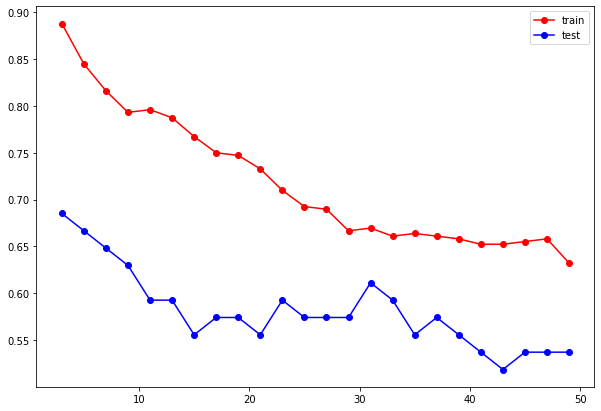

In [61]:
plt.figure(figsize = (10,7))
plt.plot(np.arange(3,50,2), [i[0] for i in acc2], 'ro-')
plt.plot(np.arange(3,50,2), [i[1] for i in acc2], 'bo-')
plt.legend(["train", "test"])

In [62]:
neigh = KNC(n_neighbors = 1)

In [63]:
neigh.fit(x2_train, y2_train)

KNeighborsClassifier(n_neighbors=1)

In [65]:
train_acc1 = np.mean(neigh.predict(x2_train) == y2_train)
test_acc1 = np.mean(neigh.predict(x2_test) == y2_test)

In [66]:
train_acc1

1.0

In [67]:
test_acc1

0.6851851851851852

In [68]:
print(classification_report(y_train, neigh.predict(x_train)))

ValueError: query data dimension must match training data dimension